In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 0s 2ms/step - loss: 12936133.0000
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 10612264.0000
Epoch 3/2000
1/1 [==============================] - 0s 1000us/step - loss: 8708948.0000
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 7150058.5000
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 5873252.0000
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 4827468.0000
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 3970889.5000
Epoch 8/2000
1/1 [==============================] - 0s 1

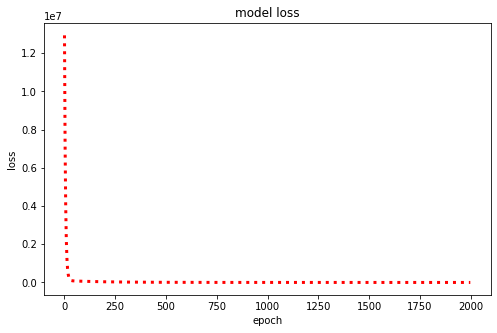



Hypothesis = X * W + b

W value is   1853.316 , b value is    -63.662


                              **** Records Prediction ****


        Distance(km)          Real record        ML Prediction    Variation(Second)

              35.000             01:47:59             01:47:02                   56

              40.000             02:02:39             02:02:29                    9

              42.195             02:09:17             02:09:16                    0



In [ ]:
# 초를 시간형식으로 변환해 주는 함수
def seconds_to_hhmmss(seconds):
    hours = seconds // (60*60)
    seconds %= (60*60)
    minutes = seconds // 60
    seconds %= 60
    return "%02i:%02i:%02i" % (hours, minutes, seconds)

# 만들어진 모델에 대해 train dataset의 loss 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(8,5))

    plt.plot(history.history['loss'], 'r:', linewidth=3)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    plt.show()
    
# pandas를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어와 marathon_2015_2017 DataFrame 을 생성합니다.
marathon_2015_2017 = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017.csv")
# marathon_2015_2017 에서 '5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time' column 만 'Official Time' 오름차순으로 정렬해 가져옵니다.
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])
# record DataFrame을 리스트로 변환합니다.
record_list = record.values.tolist()

# 마라톤 구간 정의
xData = [5, 10, 15, 20, 21.098, 25, 30, 35, 40, 42.195]

# 필요한 패키지들을 불러옵니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

t_a = 1       # 등수
t_t = 2000    # training 횟수(epoch)
t_r = 0.01    # learning rate

# training dataset 정의
x_train = [ i/10 for i in xData[0:7]]  # 0 ~ 30Km 까지의 구간 거리
y_train = record_list[t_a-1][0:7]      # 0 ~ 30Km 까지의 구간 기록

# 모델 구성하기
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

# 모델 학습과정 설정하기    
sgd = tf.keras.optimizers.SGD(lr=t_r)
model.compile(loss='mse', optimizer=sgd)

# 모델 구성 확인하기
model.summary()

# 모델 학습 시키기
history = model.fit(x_train, y_train, epochs=t_t)

# 그래프 출력
display_graph()

# 모델 학습을 통해 가장 작은 Cost를 갖는 Weight과 bias을 가져옵니다.
W_val = model.layers[0].get_weights()[0][0]
b_val = model.layers[0].get_weights()[1]

print('\n\nHypothesis = X * W + b\n')
print('W value is %10.3f , b value is %10.3f' % (W_val, b_val)+'\n\n')

# test dataset의 정답(label)
y_test = record_list[t_a-1][7:10] 

print("%60s" % ('**** Records Prediction ****\n\n'))
print("%20s %20s %20s %20s" % ('Distance(km)', 'Real record', 'ML Prediction', 'Variation(Second)')+'\n')

# 예측하기
# 30km 이후 구간 예측 결과 출력
for index in range(7, 10):
    x_value = xData[index] / 10
    time = model.predict(np.array([x_value]))
    print("%20.3f %20s %20s %20i" % (xData[index], seconds_to_hhmmss(y_test[index-7]), seconds_to_hhmmss(time[0][0]), (y_test[index-7] - time[0][0]))+'\n') 


In [ ]:
record_list[t_a-1]

[883, 1783, 2697, 3629, 3842, 4567, 5520, 6479, 7359, 7757]

In [ ]:
record_list[t_a-1][0:7]

[883, 1783, 2697, 3629, 3842, 4567, 5520]

In [ ]:
record_list[t_a-1][7:10]

[6479, 7359, 7757]

In [ ]:
type(time[0])

numpy.ndarray

In [ ]:
time[0][0]

7756.405